In [ ]:
pip install qiskit

In [ ]:
pip install matplotlib

In [1]:
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.visualization import plot_histogram
simulation = Aer.get_backend('aer_simulator')

In [2]:
def DJ(n):
    qc = QuantumCircuit(n,n-1)

    qc.x(0)
    qc.barrier()

    # f(x) = 0 for all x

    for q in range(n):
        qc.h(q)
    
    replies = ['b','c']
    reply =''
    while reply not in replies:
        reply = input('If u want balanced type b for constant type c: ')
        if reply not in replies:
            print('Wrong input!')
    
    # f(x) - balanced
    if reply == 'b':
        for q in range(1,n):
            qc.cx(q,0)  

    qc.barrier()
    
    for q in range(1,n):
        qc.h(q)

    qc.barrier()
    qc.measure([x for x in range(1,n)],[x for x in range(n-1)])

    return qc

def run(qc, Shots, sim=simulation):
    job = assemble(qc)
    results = simulation.run(job, shots=Shots).result()
    return results

In [3]:
DJ(6).draw()

If u want balanced type b for constant type c: c


┌───┐ ░ ┌───┐ ░       ░                
q_0: ┤ X ├─░─┤ H ├─░───────░────────────────
     └───┘ ░ ├───┤ ░ ┌───┐ ░ ┌─┐            
q_1: ──────░─┤ H ├─░─┤ H ├─░─┤M├────────────
           ░ ├───┤ ░ ├───┤ ░ └╥┘┌─┐         
q_2: ──────░─┤ H ├─░─┤ H ├─░──╫─┤M├─────────
           ░ ├───┤ ░ ├───┤ ░  ║ └╥┘┌─┐      
q_3: ──────░─┤ H ├─░─┤ H ├─░──╫──╫─┤M├──────
           ░ ├───┤ ░ ├───┤ ░  ║  ║ └╥┘┌─┐   
q_4: ──────░─┤ H ├─░─┤ H ├─░──╫──╫──╫─┤M├───
           ░ ├───┤ ░ ├───┤ ░  ║  ║  ║ └╥┘┌─┐
q_5: ──────░─┤ H ├─░─┤ H ├─░──╫──╫──╫──╫─┤M├
           ░ └───┘ ░ └───┘ ░  ║  ║  ║  ║ └╥┘
c: 5/═════════════════════════╩══╩══╩══╩══╩═
                              0  1  2  3  4

In [4]:
trial1 = run(DJ(6),30)

If u want balanced type b for constant type c: c


{'00000': 30}


Matplotlib is building the font cache; this may take a moment.
Fontconfig warning: ignoring UTF-8: not a valid region tag


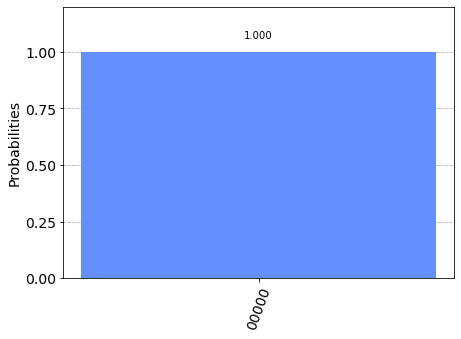

In [5]:
print(trial1.get_counts())
plot_histogram(trial1.get_counts())